In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [119]:
df = pd.read_csv(r'D:\Projects\AI Assistant\notebooks\USA_Housing.csv')
df.drop(['Address'],axis = 1,inplace=True)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [121]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


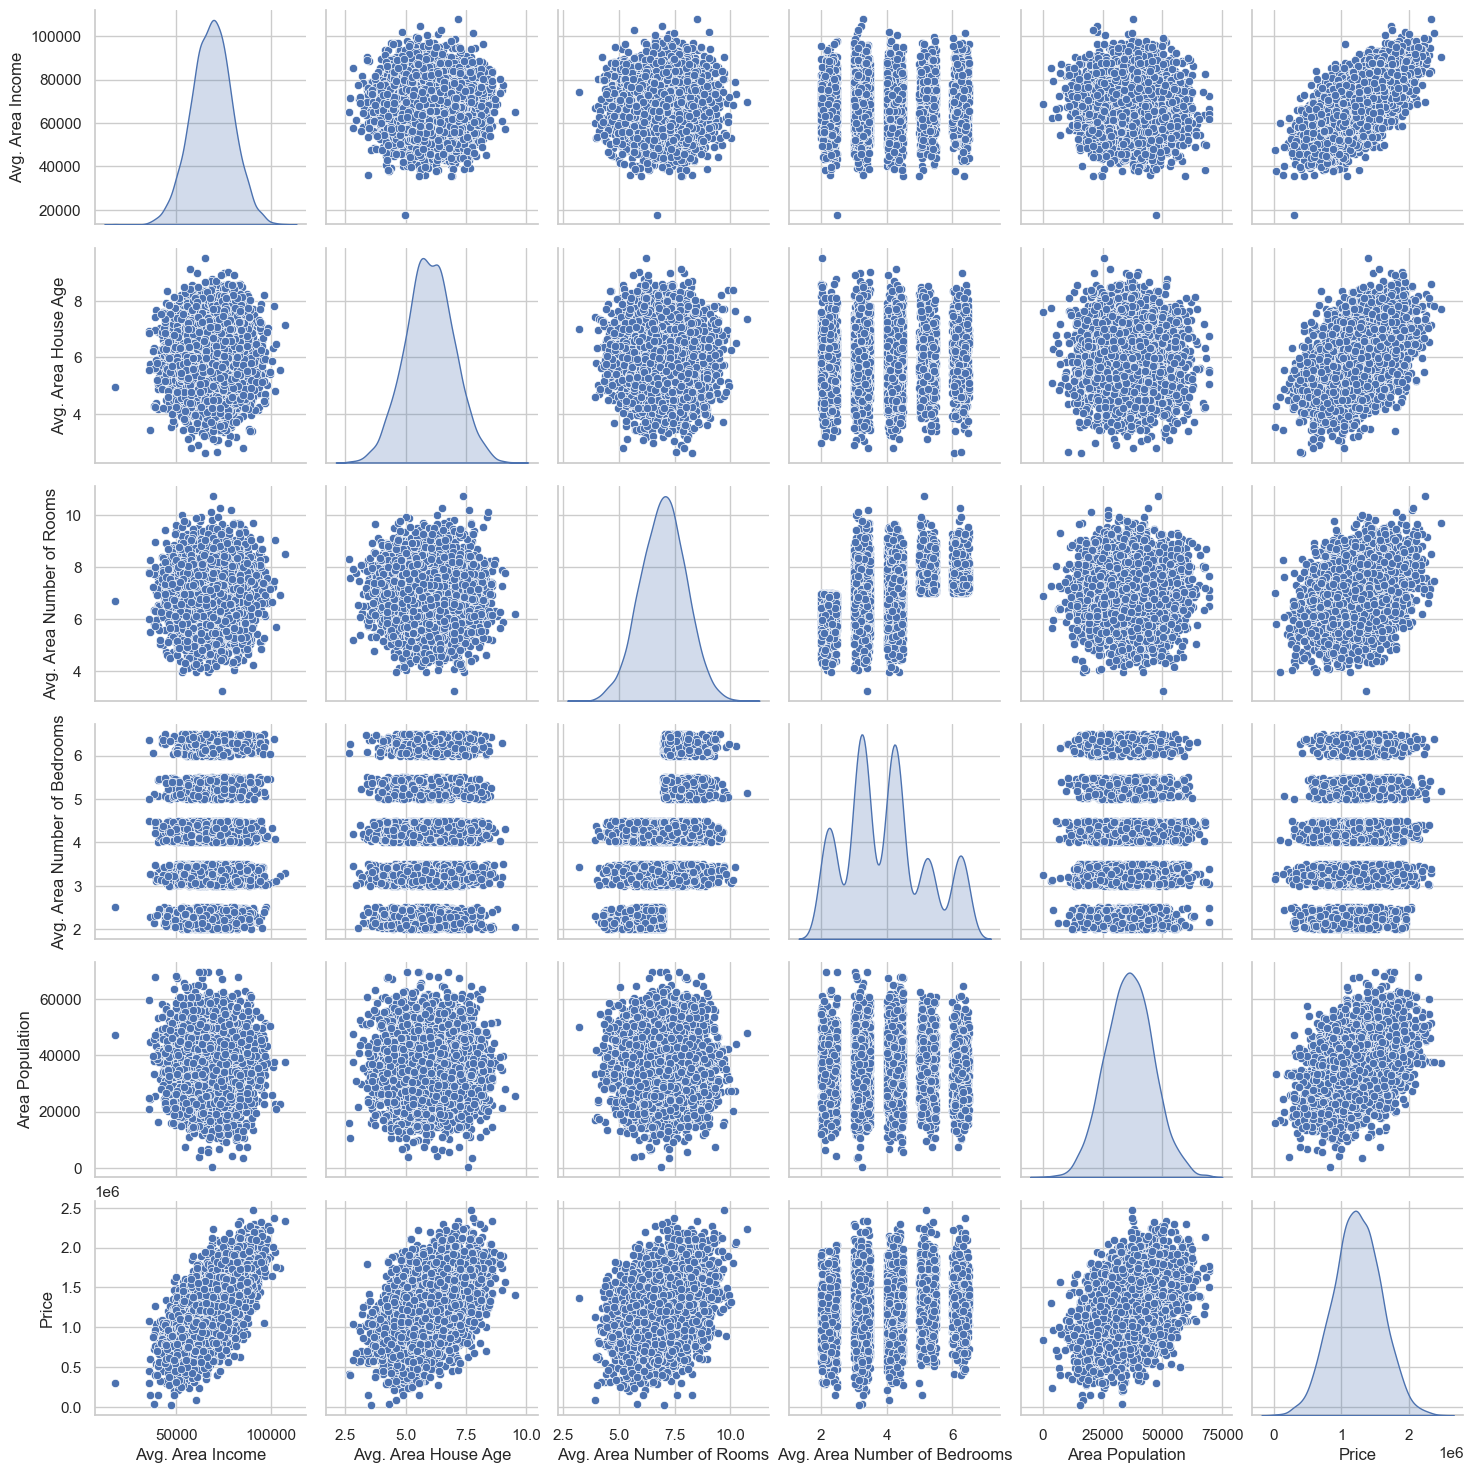

In [122]:
sns.pairplot(df,diag_kind='kde')

<Axes: >

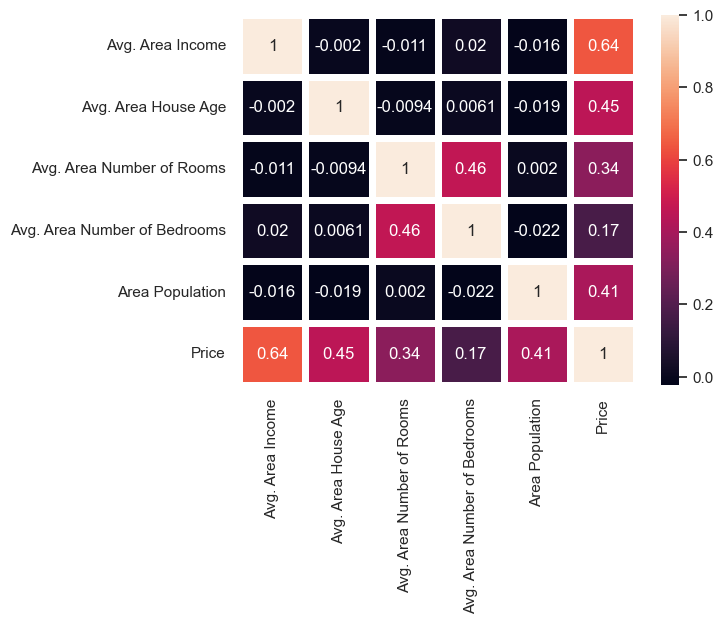

In [123]:
sns.heatmap(df.corr(),annot=True,linewidth=5)

In [124]:
import statsmodels.api as st
X=df.drop('Price',axis=1)
Y=df['Price']
X_train=st.add_constant(X)
model=st.OLS(Y,X_train).fit()
predictions=model.predict(X_train)
residuals=model.resid
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:23:21   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.637e+06   1.72e+04   -153.708      0.000   -2.67e+06    -2.6e+06
Avg. Area Income                21.5780      0.134    160.656      0.000      21.315      21.841
Avg. Area House Age           1.656e+05   1443.413    114.754      0.000    1.63e+05    1.68e+05
Avg. Area Number of Rooms     1.207e+05   1605.160     75.170      0.000    1.18e+05    1.24e+05
Avg. Area Number of Bedrooms  1651.1391   1308.671      1.262      0.207    -914.431    4216.709
Area Population                 15.2007      0.144    105.393      0.000      14.918      15.483
==============================================================================
Omnibus:                        5.580   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.959
Skew:                           0.011   Prob(JB):                       0.0838
Kurtosis:                       2.847   Cond. No.                     9.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

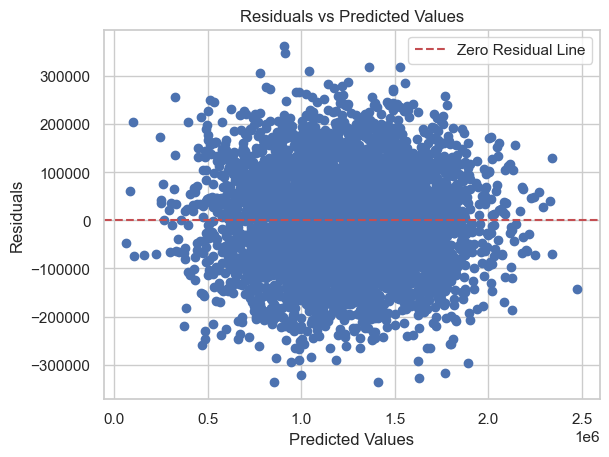

In [125]:
# Create a scatter plot of residuals vs predicted values

plt.scatter(predictions, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Histogram of residual dist.')

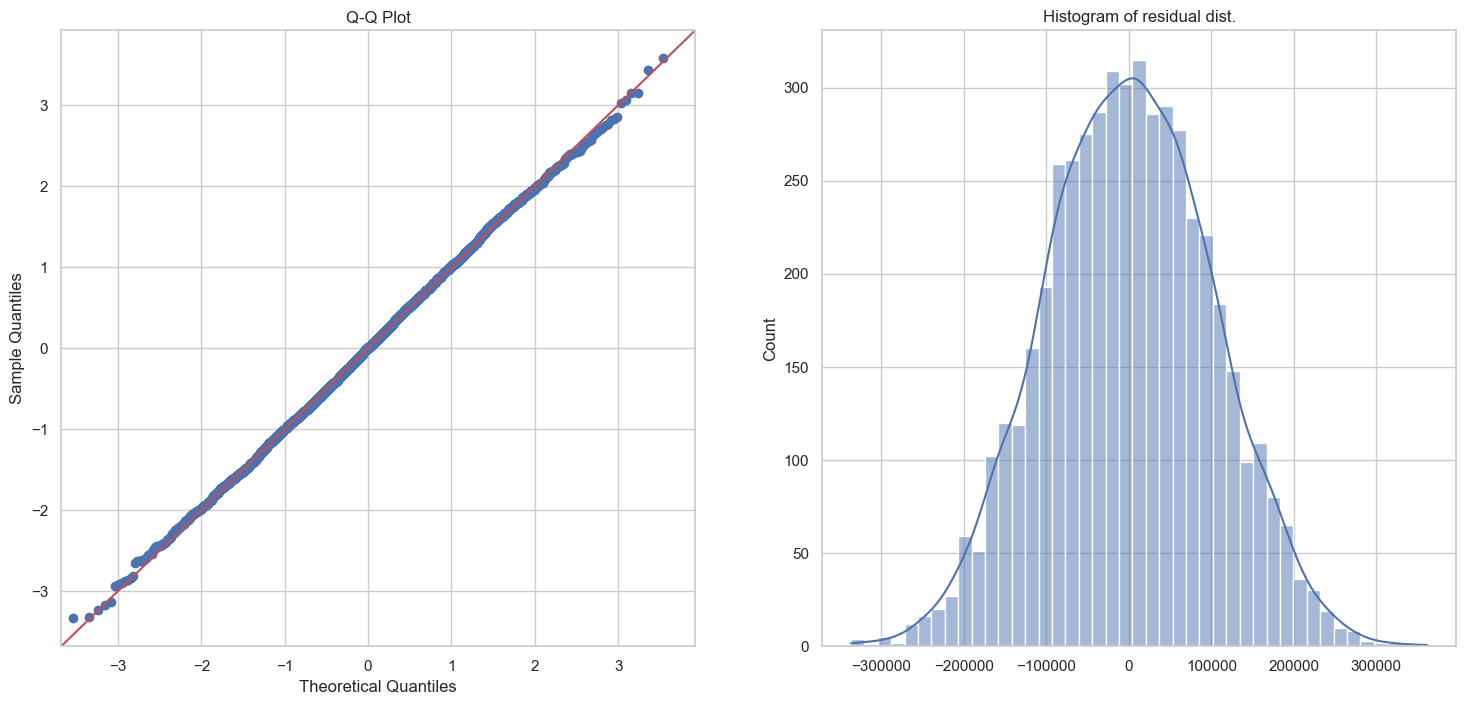

In [126]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
st.qqplot(residuals,line='45',fit=True,ax=ax[0])
ax[0].set_title('Q-Q Plot')
sns.histplot(residuals,kde=True,ax=ax[1])
ax[1].set_title('Histogram of residual dist.')

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df['feature'] = X_train.columns
vif_df['vif score'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

In [ ]:

vif_df

,feature,vif score
0,Avg. Area Income,38.270629
1,Avg. Area House Age,29.097029
2,Avg. Area Number of Rooms,45.335953
3,Avg. Area Number of Bedrooms,14.542817
4,Area Population,14.397643
5,Price,28.046950


SCALING THE DATA

In [129]:
x = df.iloc[:,0:5]
y = df.iloc[:,-1]

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=2)

X_train.shape, X_test.shape

((4000, 5), (1000, 5))

In [131]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training set for features
scaler.fit(X_train)

# Transform both the training and test sets for features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [132]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [133]:
X_train_scaled

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0.673707,-0.724372,0.504743,0.102225,1.005994
1,0.512315,0.644674,-0.582864,0.265605,0.020043
2,-1.727673,-0.392906,-1.328878,-0.592140,-0.662249
3,-1.190523,-0.942997,1.237865,0.045042,0.266055
4,0.018485,1.752397,0.615141,0.976307,-0.854733
...,...,...,...,...,...
3995,1.652288,0.179743,0.957665,0.330957,0.701686
3996,0.700655,0.669010,0.651291,1.997432,-1.373501
3997,1.408646,1.041299,-0.000373,0.249267,-1.163181
3998,0.755618,-0.137532,-0.378304,-1.474391,0.007628


In [136]:
import pandas as pd

# Reset index for X_train_scaled and X_test_scaled
X_train_scaled.reset_index(drop=True, inplace=True)
X_test_scaled.reset_index(drop=True, inplace=True)

# Concatenate X_train_scaled and X_test_scaled along rows
X_scaled = pd.concat([X_train_scaled, X_test_scaled])

# Reset index for y_train and y_test
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Concatenate y_train and y_test along rows
y = pd.concat([y_train, y_test])

# Reset index for X_scaled and y
X_scaled.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Concatenate X_scaled, y along columns to create the final df_scaled DataFrame
df_scaled = pd.concat([X_scaled, y], axis=1)

df_scaled.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.673707,-0.724372,0.504743,0.102225,1.005994,1.376638e+06
1,0.512315,0.644674,-0.582864,0.265605,0.020043,1.593348e+06
2,-1.727673,-0.392906,-1.328878,-0.592140,-0.662249,4.973680e+05
3,-1.190523,-0.942997,1.237865,0.045042,0.266055,8.970132e+05
4,0.018485,1.752397,0.615141,0.976307,-0.854733,1.521141e+06


<Axes: >

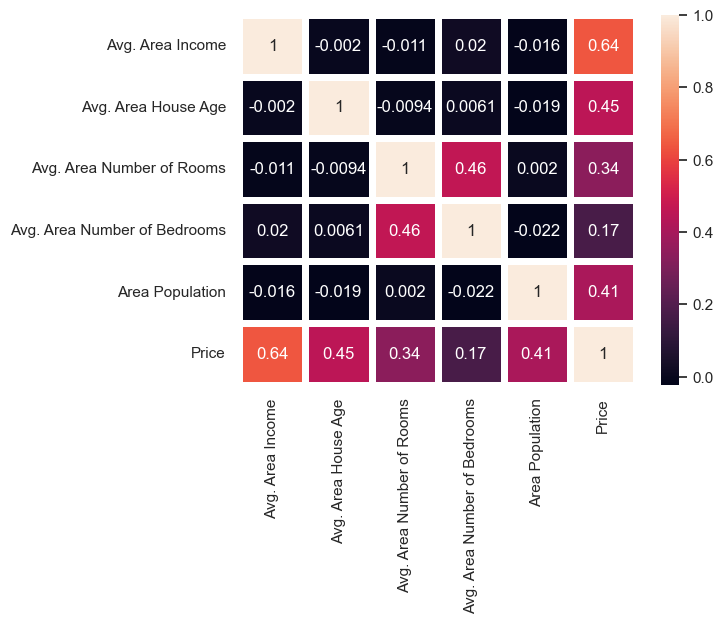

In [137]:
sns.heatmap(df_scaled.corr(),annot=True,linewidth=5)

In [139]:
import statsmodels.api as st
X=df_scaled.drop('Price',axis=1)
Y=df_scaled['Price']
X_train=st.add_constant(X)
model=st.OLS(Y,X_train).fit()
predictions=model.predict(X_train)
residuals=model.resid
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:27:38   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.233e+06   1430.693    861.553      0.000    1.23e+06    1.24e+06
Avg. Area Income              2.313e+05   1439.840    160.656      0.000    2.28e+05    2.34e+05
Avg. Area House Age            1.65e+05   1437.770    114.754      0.000    1.62e+05    1.68e+05
Avg. Area Number of Rooms     1.216e+05   1617.742     75.170      0.000    1.18e+05    1.25e+05
Avg. Area Number of Bedrooms  2021.2264   1601.998      1.262      0.207   -1119.392    5161.845
Area Population               1.515e+05   1437.672    105.393      0.000    1.49e+05    1.54e+05
==============================================================================
Omnibus:                        5.580   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.959
Skew:                           0.011   Prob(JB):                       0.0838
Kurtosis:                       2.847   Cond. No.                         1.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

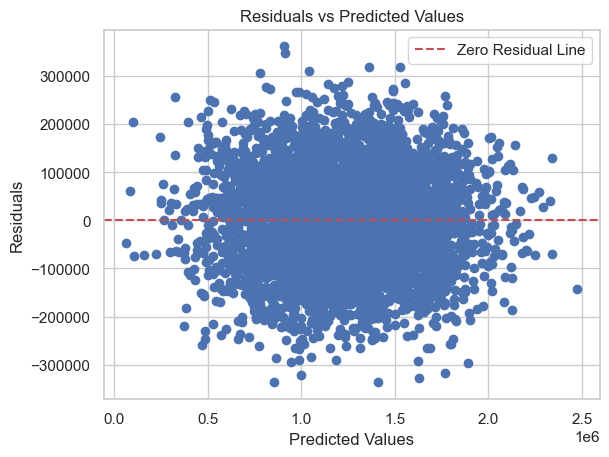

In [140]:
# Create a scatter plot of residuals vs predicted values

plt.scatter(predictions, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Histogram of residual dist.')

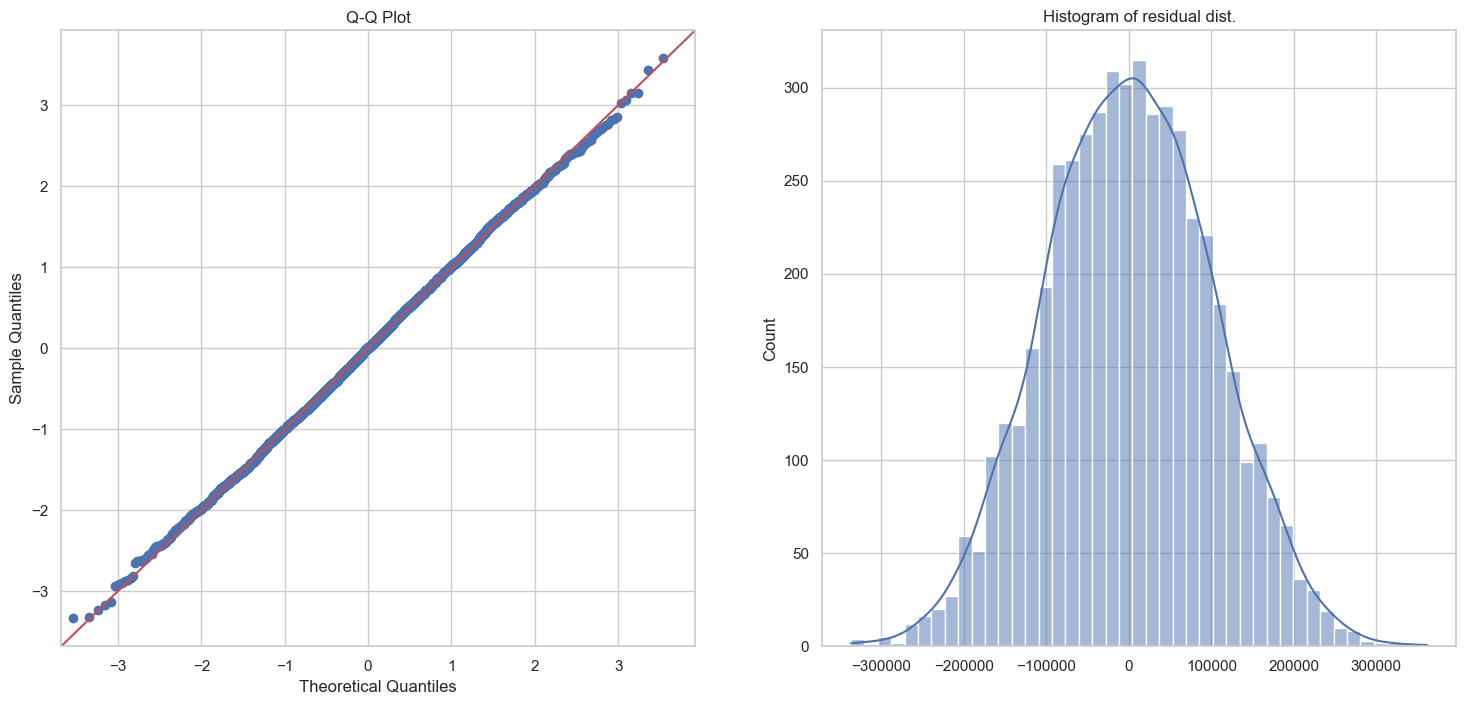

In [141]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
st.qqplot(residuals,line='45',fit=True,ax=ax[0])
ax[0].set_title('Q-Q Plot')
sns.histplot(residuals,kde=True,ax=ax[1])
ax[1].set_title('Histogram of residual dist.')

In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df['feature'] = X_train.columns
vif_df['vif score'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif_df.head()

,feature,vif score
0,const,1.000234
1,Avg. Area Income,1.001159
2,Avg. Area House Age,1.000577
3,Avg. Area Number of Rooms,1.273535
4,Avg. Area Number of Bedrooms,1.274413
